In [1]:
import pandas as pd
from datetime import datetime
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use('fivethirtyeight')
%matplotlib inline
import matplotlib.ticker as ticker

import importlib
import sys
sys.path.append('../src/')
import helper as hp

# 0. Load the clean dataset

Created in the notebook
https://github.com/yortos/imessage-analysis/blob/master/notebooks/imessages-extract-transform-load.ipynb

In [59]:
df_messages = pd.read_csv("../data/df_messages.csv")

# convert the dates and timestamps from strings to dates for cleaner plots
df_messages['timestamp'] = df_messages['timestamp'].apply(lambda x: pd.Timestamp(x))
df_messages['date'] = df_messages['timestamp'].apply(lambda x: x.date())

In [63]:
df_messages.columns

Index(['message_id', 'is_from_me', 'text_combined', 'text', 'inferred_text',
       'handle_id', 'contact_info', 'chat_id', 'chat_members_contact_info',
       'chat_size', 'chat_members_handles', 'attributedBody',
       'is_audio_message', 'message_effect', 'reaction', 'is_thread_reply',
       'link_domain', 'updated_contact_info', 'name', 'timestamp', 'date',
       'month', 'year'],
      dtype='object')

In [ ]:
# quick look at the dataframe

with pd.option_context('display.max_columns', None):
    display(df_messages.head())

# 1. Number of Messages Per Day

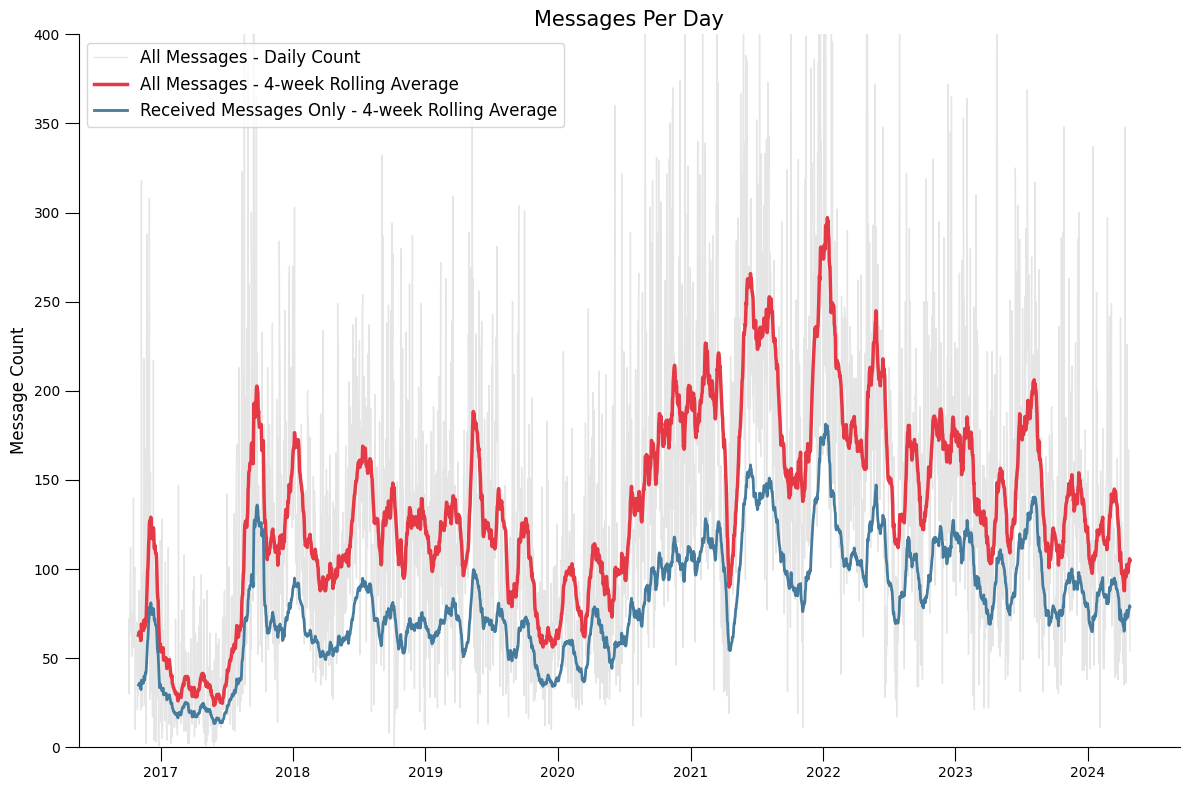

In [10]:
plt.figure(figsize=(12,8))

plt.title("Messages Per Day", fontsize=15)

daily_count = df_messages.groupby('date').size()
daily_count_received = df_messages.loc[df_messages['is_from_me']==0].groupby('date').size()

window_size=28

# plot
plt.plot(daily_count, color='grey',lw=1, alpha=0.2, label='All Messages - Daily Count')
plt.plot(hp.get_rolling_avg(daily_count,window_size=window_size)['running_avg'], color='#e63946', linewidth=2.5, label='All Messages - 4-week Rolling Average')
plt.plot(hp.get_rolling_avg(daily_count_received,window_size=window_size)['running_avg'], color='#457b9d', lw=2, label='Received Messages Only - 4-week Rolling Average')

plt.legend(loc='upper left', fontsize='large')
sns.despine()
plt.ylabel('Message Count', fontsize=12)
plt.tick_params(size=10)
plt.ylim((0,400))
plt.tight_layout()

# You can save the plot in high quality
plt.savefig('../plots/messages_per_day.png', dpi=200)


### Messages per year

In [ ]:
# here I only count the full years from 2017 to 2023. You can modify or remove as it serves you best.
start_year = 2017
end_year = 2024
yearly_counts = df_messages.loc[df_messages['year'].apply(lambda x: x>=2017 and x<=2024)].groupby('year').size()

k = end_year-start_year+1
plt.figure(figsize=(12, 8))
bars = plt.bar(range(k), yearly_counts, color='#a8dadc')


bars = yearly_counts.plot(kind='bar', color='skyblue', alpha=0)

plt.xticks(rotation=0)
plt.xlabel('')

# add the values on top of the bars
for bar in bars.patches:
    # The text annotation for each bar
    bars.annotate('{:,}'.format(int(bar.get_height())), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
    
sns.despine()
formatter = ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)
plt.title("Total Number of Messager Per Year", fontsize=14)
plt.tight_layout()

# You can save the plot in high quality
plt.savefig('../plots/messages_per_year.png', dpi=200)


### Ratio of Sent vs Received over Time

In [ ]:
plt.plot(df_messages.loc[df_messages['is_from_me']==0].groupby('date').size()/\
         df_messages.groupby('date').size()*100)

plt.ylim((0,100))
plt.axhline(y=50, color='r', ls='dashed')

### For specific person

In [ ]:
# you can plot the number of messages for any number of specific people over time

contacts = ['+123455666']
x = df_messages.loc[df_messages['contact_info'].apply(lambda x: x in contacts)].groupby('date').size()
plt.plot(hp.get_rolling_avg(x,window_size=28)['running_avg'])

contacts = ['+12223334444']
y = df_messages.loc[df_messages['contact_info'].apply(lambda x: x in contacts)].groupby('date').size()

plt.plot(hp.get_rolling_avg(y,window_size=28)['running_avg'])

# 2. Most Texted People

In [ ]:
'''
Here I only include direct messages, i.e., chat_size=1
but you edit or remove as it serves you best.
'''

most_texted_people = df_messages.loc[df_messages['chat_size']==1].groupby('name').size().sort_values(ascending=False)
most_texted_people.reset_index(name = 'Number of Messages')[:10].style.background_gradient(cmap='Blues')


# 3. Reactions, effects, threads, links and audio messages

* What % of your total messages are reactions? How about for specific people?
* What % of your total messages are sent/received with an effect? What chat has the highest % of effects?
* Who sends and shares the most links? What are the types of links shared the most?
* What % of messages are sent in a thread?

In [13]:
df_messages.groupby('is_thread_reply').size()

is_thread_reply
False    362588
True       8268
dtype: int64

In [14]:
df_messages.groupby('message_effect').size()

message_effect
0                370705
Confetti              5
Echo                 68
Fireworks            19
HappyBirthday         7
Heart                 5
Lasers                5
ShootingStar          2
Sparkles              2
Spotlight             2
gentle                3
impact               10
invisibleink         14
loud                  9
dtype: int64

In [50]:
df_messages['timestamp'][0]

Timestamp('2024-04-26 14:35:03')

In [15]:
df_messages.groupby('reaction').size()

reaction
0                        342906
Disliked                    277
Emphasized                 3251
Laughed                    3630
Liked                      5442
Loved                     14776
Questioned                  523
Removed dislike               3
Removed emphasis              3
Removed heart                25
Removed laugh                 7
Removed like                  8
Removed question mark         5
dtype: int64

In [18]:
df_messages.groupby('link_domain').size().sort_values(ascending=False)[:10]

link_domain
spotify.com      936
tiktok.com       434
youtube.com      372
twitter.com      292
goo.gl           246
reddit.com       213
youtu.be         160
instagram.com    113
google.com       113
nytimes.com       80
dtype: int64

In [48]:
df_messages.groupby('is_audio_message').size()

is_audio_message
0    370837
1        19
dtype: int64

# 4 & 5. Average Texts Per Day and Number of Texted Days Per Person

In [ ]:
time_periods = pd.DataFrame({ 'cnt_messages' : df_messages.groupby('name').size(),
                              'min_date' : df_messages.groupby('name')['date'].min(),
                              'max_date' : df_messages.groupby('name')['date'].max(),
                              'cnt_message_days' : df_messages.groupby('name')['date'].nunique()}).reset_index()


time_periods['today'] = date.today()
time_periods['num_days_since_first_message_to_last_message'] = time_periods.apply(lambda x: (x['max_date']-x['min_date']).days, axis=1 )
time_periods['num_days_since_first_message'] = time_periods.apply(lambda x: (x['today']-x['min_date']).days, axis=1 )
time_periods.sort_values(by='cnt_messages', ascending=False, inplace=True)

time_periods['avg_messages_per_day'] = time_periods['cnt_messages']/time_periods['num_days_since_first_message']
time_periods['pct_texting_days'] = time_periods['cnt_message_days']/time_periods['num_days_since_first_message']*100

time_periods.head()

In [ ]:
time_periods[['name','avg_messages_per_day','pct_texting_days','num_days_since_first_message']].head().\
style.background_gradient(cmap='Blues').format({'pct_texting_days': "{:.1f}%",\
                                               'avg_messages_per_day' :"{:.1f}"})



# 6. Seasonality

## 6a. Day of Week

In [26]:
# run this in case there are some rows with null values for the date
# df_messages.dropna(subset=['date'], inplace=True)

In [ ]:
# assign the day of week to a column
# dow is the English word of the day
# dow_number is a numbering starting from 0 being Monday

df_messages['dow'] = df_messages['date'].apply(lambda x: x.strftime("%A"))
df_messages['dow_number'] = df_messages['date'].apply(lambda x: x.weekday())

per_dow = pd.DataFrame({'cnt_received' : df_messages.loc[df_messages['is_from_me']==0].groupby('dow_number').size(),\
                        'cnt_sent' : df_messages.loc[df_messages['is_from_me']==1].groupby('dow_number').size(),
                        'dow': df_messages.loc[df_messages['is_from_me']==0].groupby('dow_number')['dow'].min()})


per_dow['pct_of_total_received'] = per_dow['cnt_received'].apply(lambda x: x/per_dow['cnt_received'].sum()*100)
per_dow['pct_of_total_sent'] = per_dow['cnt_sent'].apply(lambda x: x/per_dow['cnt_sent'].sum()*100)

per_dow

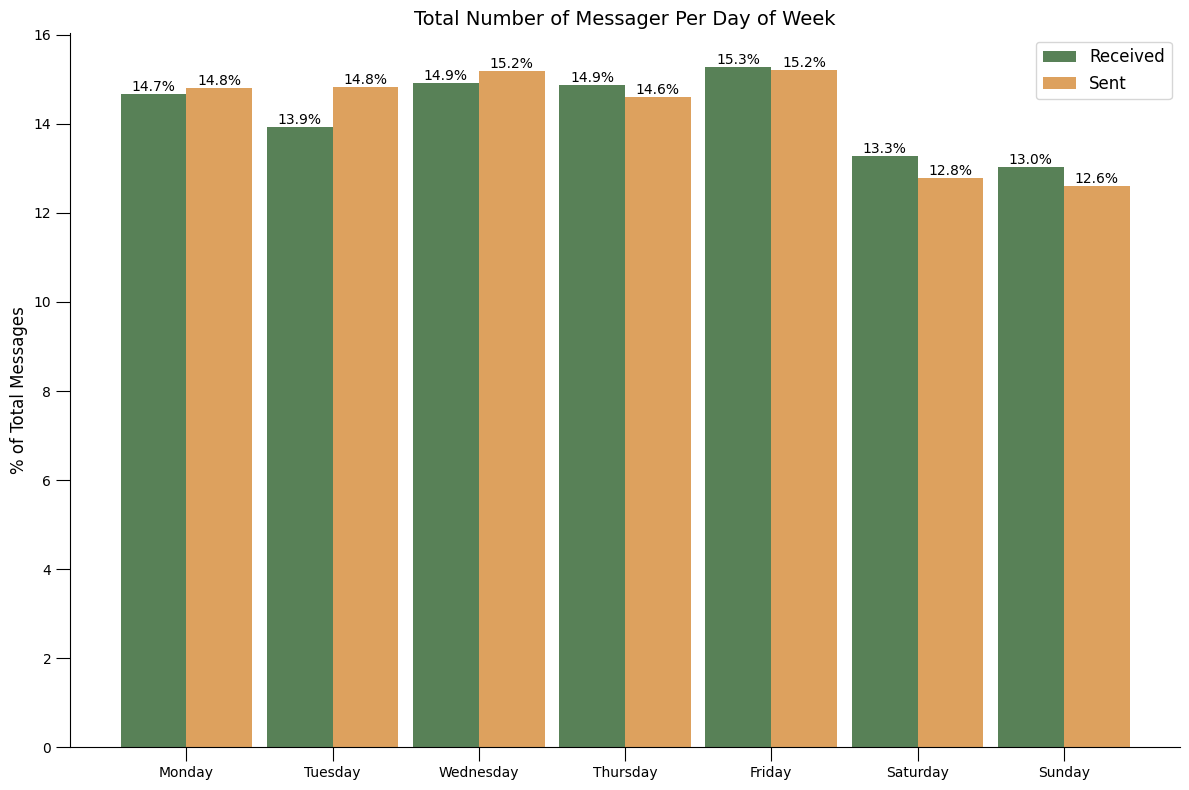

In [24]:
plt.figure(figsize=(12, 8))

# You need to use at most 0.5 so that two bars can fit in one slot.
# I use 0.45 so that there is some space between slots.
width=0.45 
bars_received = plt.bar(range(7), per_dow['pct_of_total_received'], color='#588157', width=width, label='Received')
bars_sent = plt.bar([x+width for x in range(7)], per_dow['pct_of_total_sent'], color='#dda15e', width=width, label='Sent')


plt.xticks([x+width/2 for x in range(7)], per_dow['dow'], rotation=0)

plt.xlabel('')

for bar in bars_received.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, str(round(yval, 1))+'%', va='bottom', ha='center')

for bar in bars_sent.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, str(round(yval, 1))+'%', va='bottom', ha='center')
    
plt.legend(loc='best', fontsize='large')

sns.despine()
# formatter = ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}')
# plt.gca().yaxis.set_major_formatter(formatter)
plt.ylabel("% of Total Messages", fontsize=12)
plt.tick_params(size=10)
plt.title("Total Number of Messager Per Day of Week", fontsize=14)
plt.tight_layout()


## 6b. Day of the Month - Simplified into three groups

In [25]:
def part_of_month(n):
    if n<11:
        return 0
    elif n<21:
        return 1
    else:
        return 2


df_messages['day_of_month'] = df_messages['date'].apply(lambda x: x.day)
df_messages['part_of_month'] = df_messages['day_of_month'].apply(lambda x: part_of_month(x))


# per day of month - omitting here, for the simpler part of month
# per_dom = pd.DataFrame({'cnt_received' : df_messages.loc[df_messages['is_sent']==0].groupby('day_of_month').size(),
#                        'cnt_sent': df_messages.loc[df_messages['is_sent']==1].groupby('day_of_month').size() }).reset_index()

# per_dom['pct_of_total_received'] = per_dom['cnt_received'].apply(lambda x: x/per_dom['cnt_received'].sum()*100)
# per_dom['pct_of_total_sent'] = per_dom['cnt_sent'].apply(lambda x: x/per_dom['cnt_sent'].sum()*100)


per_dom = pd.DataFrame({'cnt_received' : df_messages.loc[df_messages['is_from_me']==0].groupby('part_of_month').size(),
                       'cnt_sent': df_messages.loc[df_messages['is_from_me']==1].groupby('part_of_month').size() }).reset_index()

per_dom['pct_of_total_received'] = per_dom['cnt_received'].apply(lambda x: x/per_dom['cnt_received'].sum()*100)
per_dom['pct_of_total_sent'] = per_dom['cnt_sent'].apply(lambda x: x/per_dom['cnt_sent'].sum()*100)


per_dom

,part_of_month,cnt_received,cnt_sent,pct_of_total_received,pct_of_total_sent
0,0,73634,49041,32.936283,33.451110
1,1,73806,47381,33.013218,32.318816
2,2,76125,50183,34.050500,34.230074


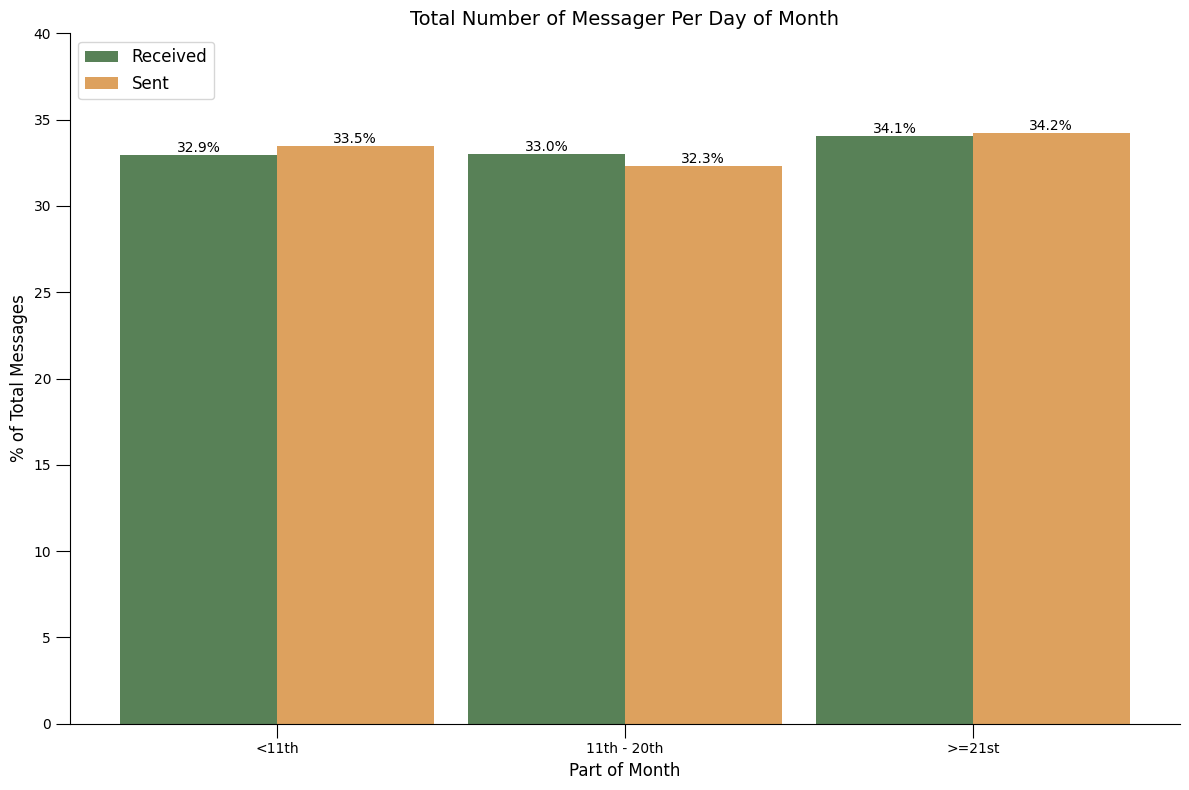

In [26]:
## part of month

plt.figure(figsize=(12, 8))
width=0.45

bars_received = plt.bar(range(3), per_dom['pct_of_total_received'], color='#588157', width=width, label='Received')
bars_sent = plt.bar([x+width for x in range(3)], per_dom['pct_of_total_sent'], color='#dda15e', width=width, label='Sent')


plt.xticks([x +width/2 for x in range(3)], ['<11th', '11th - 20th','>=21st'], rotation=0)

plt.xlabel('')

for bar in bars_received.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, str(round(yval, 1))+'%', va='bottom', ha='center')
    
for bar in bars_sent.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, str(round(yval, 1))+'%', va='bottom', ha='center')

    
sns.despine()
# formatter = ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}')
# plt.gca().yaxis.set_major_formatter(formatter)
plt.ylabel("% of Total Messages", fontsize=12)
plt.tick_params(size=10)
plt.ylim((0,40))
plt.xlabel('Part of Month', fontsize=12)
plt.legend(loc='upper left', fontsize='large')
plt.title("Total Number of Messager Per Day of Month", fontsize=14)
plt.tight_layout()


## 6c. Month of year

In [27]:
# helped dictionary to translate months numbers into easily readable names
month_dict = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}


per_moy = pd.DataFrame({'cnt_received' : df_messages.loc[df_messages['is_from_me']==0].groupby('month').size(),
                       'cnt_sent':df_messages.loc[df_messages['is_from_me']==1].groupby('month').size() }).reset_index()

#using this to print out names of months instead of just numbers from 1 to 12.
per_moy['month_of_year'] = per_moy['month'].apply(lambda x: month_dict[x])

per_moy['pct_of_total_received'] = per_moy['cnt_received'].apply(lambda x: x/per_moy['cnt_received'].sum()*100)
per_moy['pct_of_total_sent'] = per_moy['cnt_sent'].apply(lambda x: x/per_moy['cnt_sent'].sum()*100)


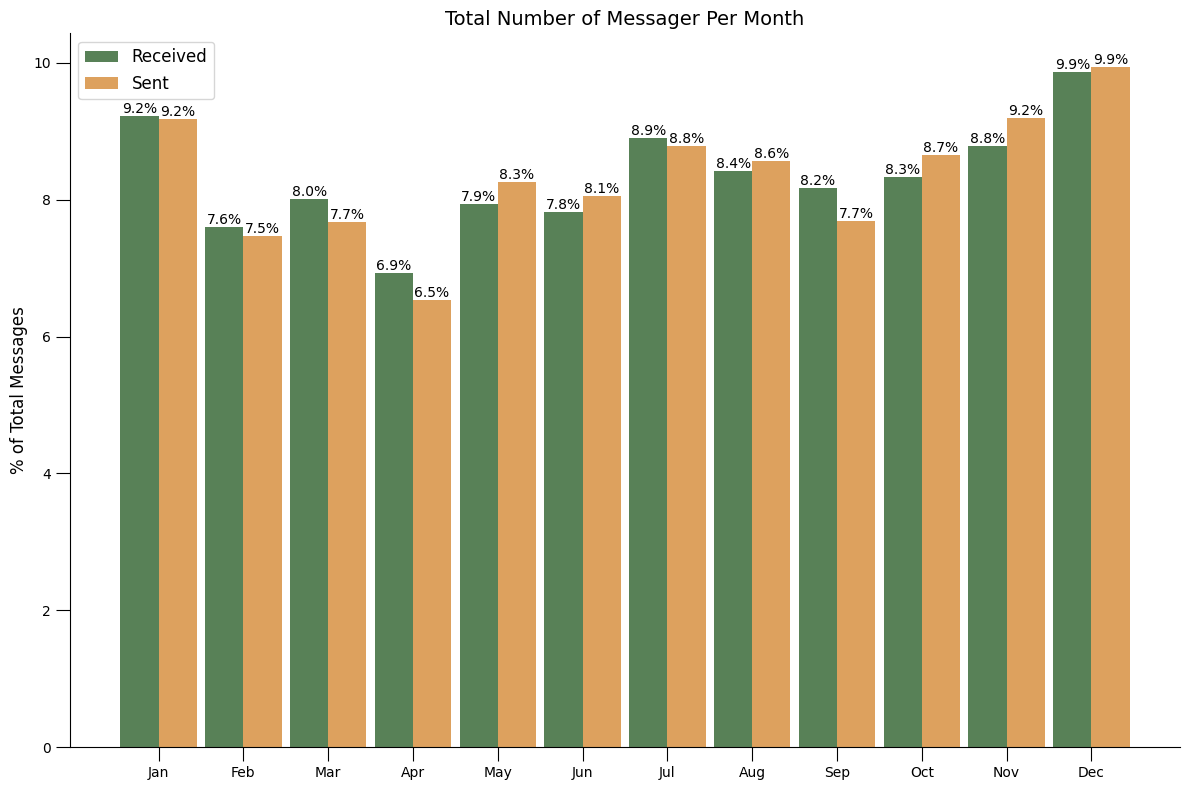

In [28]:
# month of year

plt.figure(figsize=(12, 8))

width = 0.45
bars_received = plt.bar(range(12), per_moy['pct_of_total_received'], color='#588157', width=width ,label='Received')
bars_sent = plt.bar([x+width for x in range(12)], per_moy['pct_of_total_sent'], color='#dda15e' , width=width, label='Sent')


# bars = yearly_counts.plot(kind='bar', color='skyblue', alpha=0)

plt.xticks([x+width/2 for x in range(12)], per_moy['month_of_year'], rotation=0)

plt.xlabel('')

for bar in bars_received.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, str(round(yval, 1))+'%', va='bottom', ha='center')
    
for bar in bars_sent.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, str(round(yval, 1))+'%', va='bottom', ha='center')

    
sns.despine()
# formatter = ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}')
# plt.gca().yaxis.set_major_formatter(formatter)
plt.legend(loc='best', fontsize='large')
plt.ylabel("% of Total Messages", fontsize=12)
plt.tick_params(size=10)
plt.title("Total Number of Messager Per Month", fontsize=14)
plt.tight_layout()
